In [ ]:
!pip install tensorflow spektral networkx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import os

In [ ]:
# Putanja do foldera sa GML fajlovima
folder_path = 'sample_data/'

# Lista svih GML fajlova u folderu
gml_files = [f for f in os.listdir(folder_path) if f.endswith('.gml')]

In [ ]:
nx_graphs = []

In [ ]:
for gml_file in gml_files:
    file_path = os.path.join(folder_path, gml_file)

    try:
      G = nx.read_gml(file_path)
      G.graph['molecule_name'] = os.path.basename(gml_file)[9:-8]
      print(G.graph['molecule_name'])
      nx_graphs.append(G)
    except Exception as e:
      print(f"Greška pri učitavanju fajla {gml_file}: {e}")
print("Ucitani svi grafovi iz foldera")

(-)-Eburnamonine
((3,4-Dihydroxyphenyl)methylene)-Propanedinitrile
(+-)-Diclofop-methyl
Ucitani svi grafovi iz foldera


In [ ]:
def show_graphs():
    for G in nx_graphs:
        plt.figure(figsize=(12, 6))
        pos = nx.spring_layout(G)
        nx.draw_networkx(G, pos, with_labels=False, node_color='lightblue', node_size=500, edge_color='gray')

        node_labels = nx.get_node_attributes(G, 'atom_label')
        nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')
        nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightcoral')

        edge_labels = nx.get_edge_attributes(G, 'bond_type')
        edge_labels_str = {
          (u, v): {1: "S", 2: "D", 3: "T", 4: "A"}.get(edge_labels[(u, v)], "Unknown")
          for u, v in edge_labels
       }
        edge_colors = [
        'skyblue' if G.edges[u, v]['bond_type'] == 1 else
        'b' if G.edges[u, v]['bond_type'] == 2 else
        'g' if G.edges[u, v]['bond_type'] == 3 else
        'purple'
        for u, v in G.edges()
        ]
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_str, font_color='black')

        graph_label = G.graph.get('label', 'No Label')
        plt.text(0.5, 1.05, f"Molecule name: {G.graph['molecule_name']}\n Label: {graph_label}", fontsize=15, ha='center', transform=plt.gca().transAxes)

        plt.show()

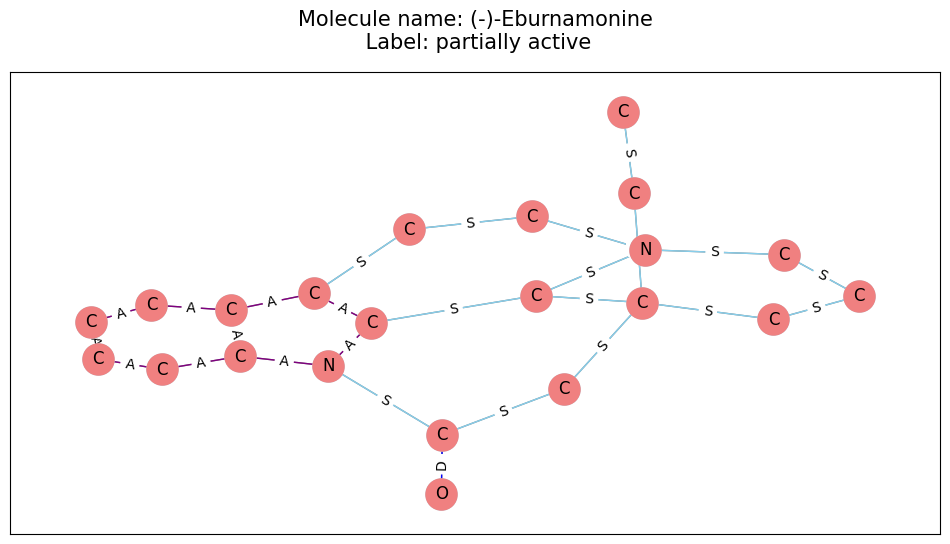

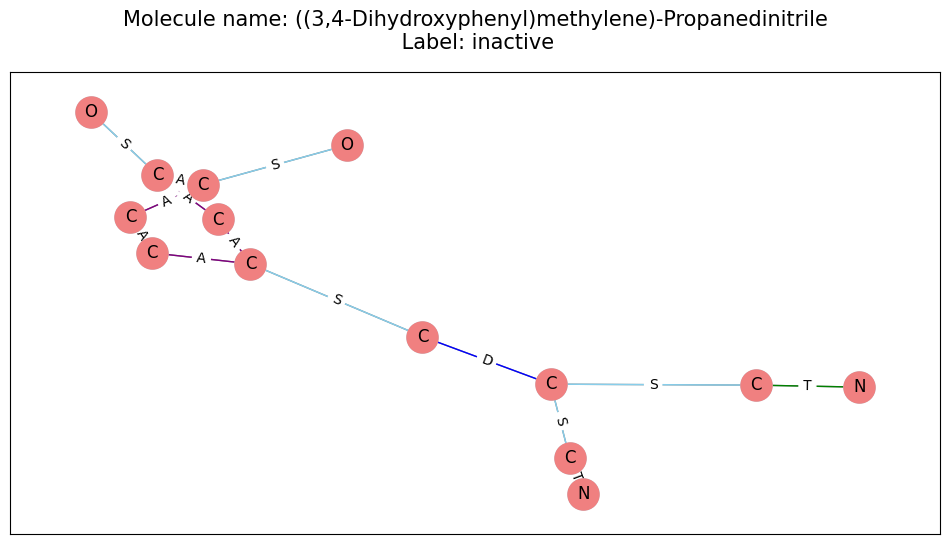

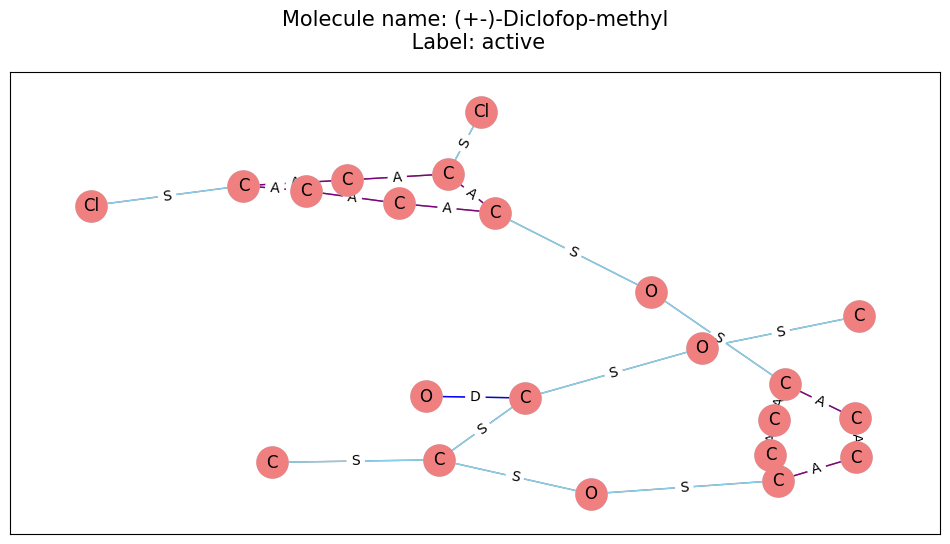

In [ ]:
show_graphs()